In [1]:
from __future__ import print_function
import torch

x = torch.rand(5, 3)
print(x)


tensor([[0.8689, 0.5572, 0.5946],
        [0.3261, 0.7606, 0.2818],
        [0.1890, 0.0337, 0.3868],
        [0.2969, 0.7813, 0.3617],
        [0.1595, 0.7313, 0.7509]])


In [2]:

from PIL import Image
import numpy as np

img_bytes = tf.io.read_file('sound.png')
img_tensor_uint8 = tf.image.decode_png(img_bytes)
img_tensor_float32 = tf.cast(img_tensor_uint8, tf.float32) / 255

NameError: name 'tf' is not defined

In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [2]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
        
        print(x_train)
        print(y_train)
        print(x_train.shape)
        



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 8 4 8]
(50000, 784)


<class 'numpy.ndarray'>
(784,)
2


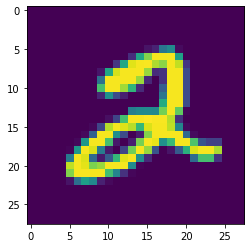

In [13]:
from matplotlib import pyplot
import numpy as np

i = 5
print(type(x_train[i]))
pyplot.imshow(x_train[i].reshape((28, 28)))
print(x_train[i].shape)
print(y_train[i])

#myTab = [[2,0,2],[5,0,5],[2,1,2]]
#myTab2 = np.array([2,0,2,5,0,5,2,1,2])
#print(myTab2)
#pyplot.imshow(myTab2.reshape((3,3)))

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


/home/krys/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


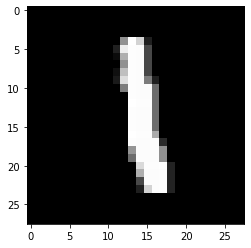

In [23]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

pyplot.imshow(x_train[6].reshape((28, 28)), cmap="gray")


In [7]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

print(weights)

tensor([[-0.0332,  0.0316, -0.0056,  ...,  0.0415,  0.0329,  0.0330],
        [-0.0481, -0.0582, -0.0334,  ..., -0.0374, -0.0445,  0.0226],
        [-0.0251,  0.0069, -0.0022,  ...,  0.0233,  0.0265,  0.0173],
        ...,
        [ 0.0005,  0.0267, -0.0530,  ..., -0.0031,  0.0761,  0.0491],
        [ 0.0209,  0.0195, -0.0248,  ..., -0.0334,  0.0103,  0.0392],
        [-0.0339, -0.0182, -0.0233,  ..., -0.0251,  0.0618, -0.0125]],
       requires_grad=True)


In [8]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [9]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.3316, -2.2598, -1.4197, -2.9621, -2.4382, -2.0813, -2.5453, -2.2657,
        -2.7244, -3.0987], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [10]:
input = torch.randn(20, 16, 50)
print(input)

tensor([[[-1.2535e+00, -4.4153e-01,  7.5015e-01,  ...,  1.2192e+00,
          -1.4517e+00,  3.4413e-01],
         [ 1.2727e-01, -7.5301e-01,  2.5188e-01,  ...,  2.4490e-01,
          -1.0138e+00, -2.8827e-01],
         [-2.7913e-01, -1.3751e-01,  1.2749e+00,  ...,  5.8783e-01,
           2.8304e-01, -4.2868e-01],
         ...,
         [ 1.3026e+00,  1.8133e+00, -2.1198e+00,  ..., -8.6294e-01,
           1.0062e+00,  2.9408e-01],
         [-3.0269e+00,  9.1963e-01, -2.5475e-01,  ..., -1.0391e+00,
          -1.1631e+00,  2.6519e-01],
         [-1.1213e+00, -1.3038e-01,  3.4625e-01,  ..., -1.0499e+00,
          -2.0837e-01,  1.8073e-01]],

        [[-1.1092e-01,  8.1321e-01, -4.0478e-03,  ...,  6.3623e-01,
           2.1298e-01,  9.8246e-01],
         [-9.2174e-02,  1.4063e+00,  1.2253e+00,  ..., -5.7350e-01,
           9.3174e-01,  8.4976e-01],
         [-4.2252e-01, -2.2044e-01, -5.9148e-01,  ..., -2.4335e+00,
          -5.2848e-01, -2.5254e+00],
         ...,
         [ 4.8536e-01, -1

In [11]:
sprawdzam

NameError: name 'sprawdzam' is not defined